In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1&2. Downloading and Loading the dataset

In [4]:
data = pd.read_csv(r"Mall_Customers.csv")

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Visualizing the analysis

# 3.1 Univariate Analysis

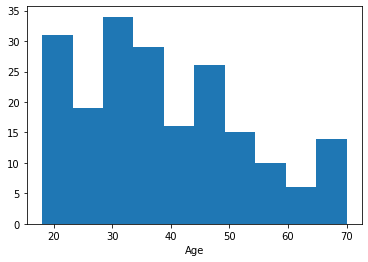

In [6]:
plt.hist(data['Age']);
plt.xlabel('Age');
plt.show();

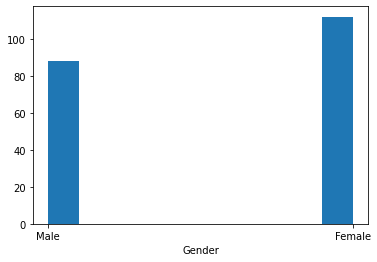

In [7]:
plt.hist(data['Gender']);
plt.xlabel('Gender');
plt.show();

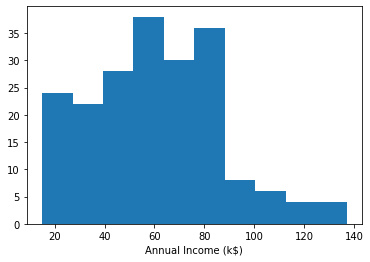

In [8]:
plt.hist(data['Annual Income (k$)']);
plt.xlabel('Annual Income (k$)');
plt.show();

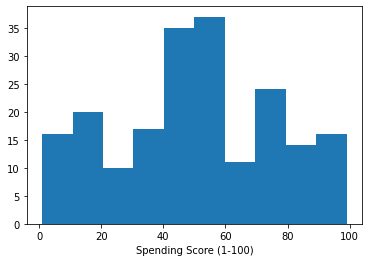

In [9]:
plt.hist(data['Spending Score (1-100)']);
plt.xlabel('Spending Score (1-100)');
plt.show();

# 3.2 Bi - Variate Analysis

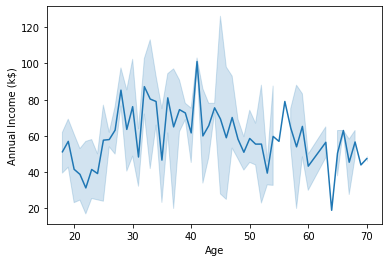

In [10]:
sns.lineplot(x=data["Age"], y=data["Annual Income (k$)"]);
plt.xlabel('Age');
plt.ylabel('Annual Income (k$)');
plt.show();

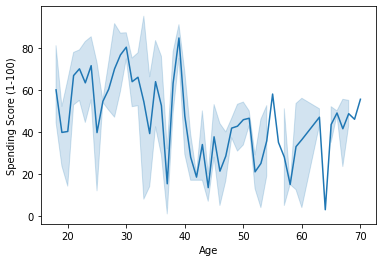

In [11]:
sns.lineplot(x=data["Age"], y=data["Spending Score (1-100)"]);
plt.xlabel('Age');
plt.ylabel('Spending Score (1-100)');
plt.show();

# 3.3 Multi - Variate Analysis

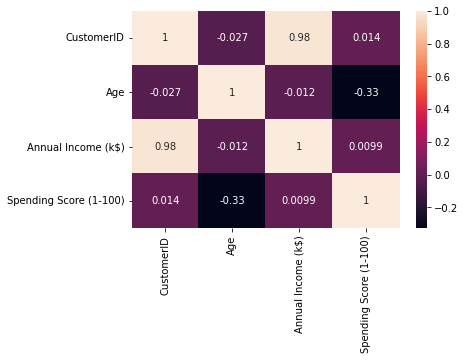

In [12]:
sns.heatmap(data.corr(), annot=True);

# 4. Descriptive statistics

In [39]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.517500,50.200000,2.090000
std,57.879185,0.497633,13.969007,26.143551,25.823522,1.382555
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,3.000000
max,200.000000,1.000000,70.000000,132.750000,99.000000,4.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    int64  
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
 5   Cluster                 200 non-null    int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 8.7 KB


In [41]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [42]:
data.shape

(200, 6)

# 5. Handling missing values

In [43]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
Cluster                   False
dtype: bool

In [44]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

# 6. Finding outliers and replacing them

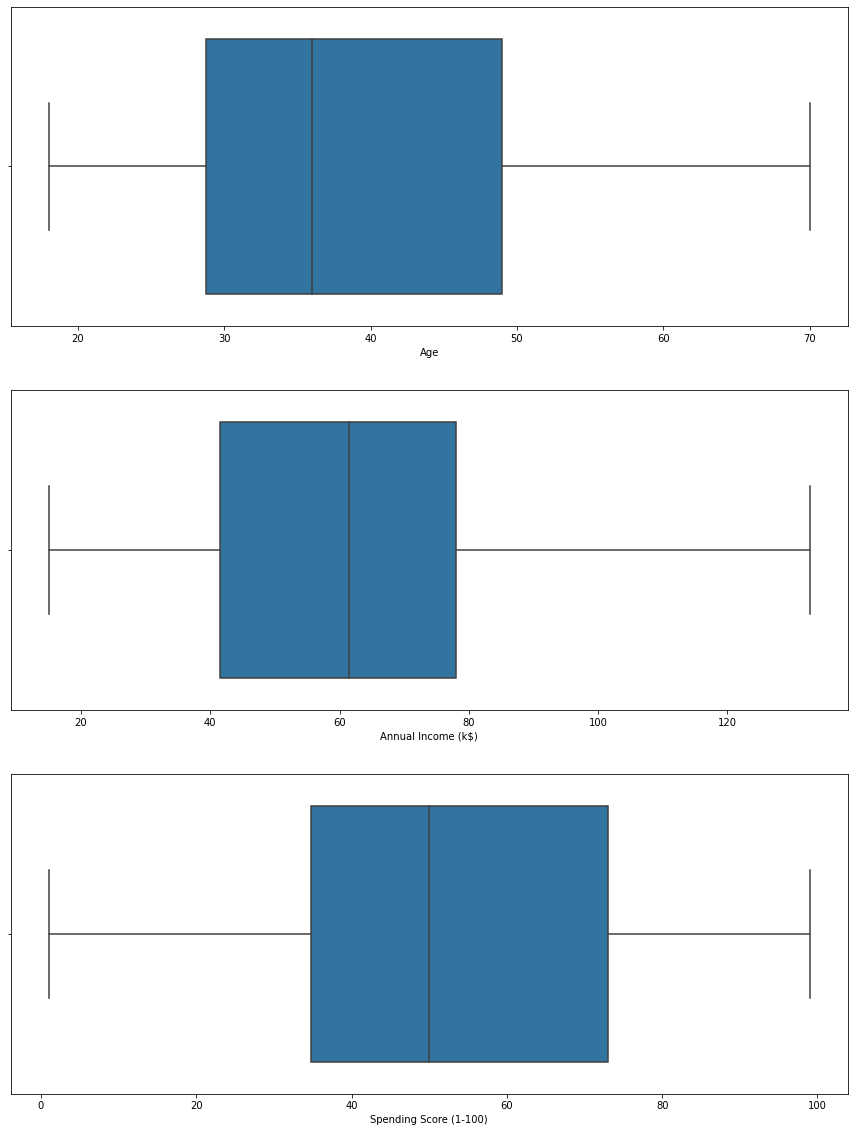

In [45]:
cols=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
for i in range(3):    
    sns.boxplot(ax=axes[i], data=data, x=cols[i])
plt.show()

In [46]:
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    data[col]=np.where(data[col]>upper,upper,np.where(data[col]<lower,lower,data[col]))

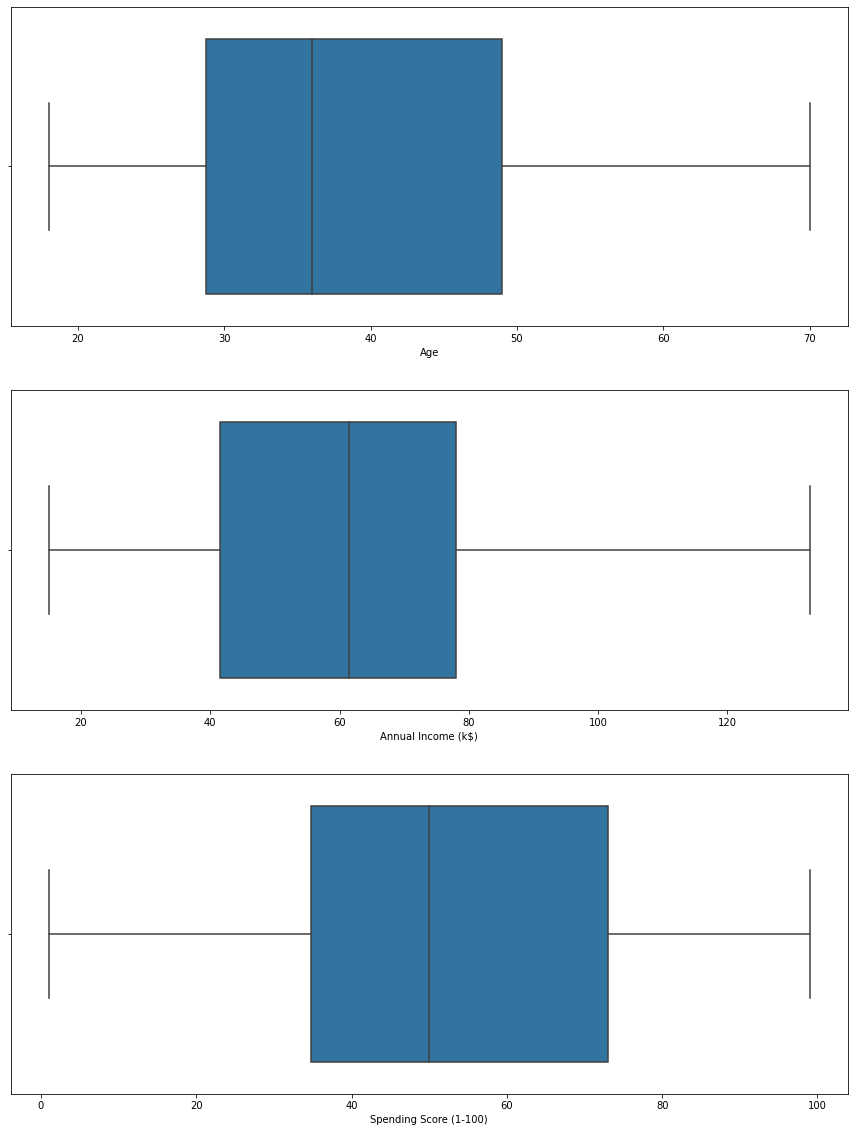

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
for i in range(3):    
    sns.boxplot(ax=axes[i], data=data, x=cols[i])
plt.show()

# 7. Encoding the categorical columns

In [22]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
data['Gender'].replace({'Male':1,"Female":0},inplace=True)

In [24]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15.00,39.0
1,2,1,21.0,15.00,81.0
2,3,0,20.0,16.00,6.0
3,4,0,23.0,16.00,77.0
4,5,0,31.0,17.00,40.0
...,...,...,...,...,...
195,196,0,35.0,120.00,79.0
196,197,0,45.0,126.00,28.0
197,198,1,32.0,126.00,74.0
198,199,1,32.0,132.75,18.0


# 8. Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.74542941, -0.43480148,
        -0.06526024],
       [-1.70609137,  1.12815215, -1.28103541, -1.74542941,  1.19570407,
        -0.06526024],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70708307, -1.71591298,
        -0.06526024],
       ...,
       [ 1.68877065,  1.12815215, -0.49160182,  2.51101403,  0.92395314,
         0.65985354],
       [ 1.70609137,  1.12815215, -0.49160182,  2.76985181, -1.25005425,
        -1.51548781],
       [ 1.7234121 ,  1.12815215, -0.6351352 ,  2.76985181,  1.27334719,
         0.65985354]])

# 9. Clustering

In [49]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [50]:
kmeans.labels_

array([4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 1, 4, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 1, 2, 1, 2, 1, 4, 1, 1, 4, 2, 2, 1, 4,
       2, 2, 4, 4, 1, 2, 2, 2, 1, 4, 2, 1, 4, 2, 1, 1, 1, 2, 4, 1, 2, 4,
       4, 2, 2, 4, 1, 2, 2, 4, 2, 4, 1, 4, 4, 2, 1, 4, 1, 4, 2, 1, 1, 1,
       1, 4, 2, 4, 4, 4, 2, 2, 2, 2, 0, 2, 2, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [51]:
kmeans.cluster_centers_

array([[ 1.04747082,  0.07050951, -0.45213014,  0.97500356,  1.21414431,
         0.65985354],
       [-0.55195376,  1.12815215,  1.23079873, -0.50812092, -0.4128026 ,
        -0.79037402],
       [-0.53039438, -0.88640526,  0.76344004, -0.48467666, -0.35526462,
         1.38496733],
       [ 1.08067278,  0.14809719,  0.07477313,  1.02768443, -1.21752808,
        -1.51548781],
       [-0.8380566 , -0.11157549, -1.01743084, -0.80594414,  0.45062873,
        -0.06526024]])

# 10. Add cluster data with primary dataset

In [52]:
data['Cluster']=kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19.0,15.0,39.0,4
1,2,1,21.0,15.0,81.0,4
2,3,0,20.0,16.0,6.0,4
3,4,0,23.0,16.0,77.0,4
4,5,0,31.0,17.0,40.0,4


# 11. Split data into dependent and independent variables

In [53]:
x=data.drop('Cluster',axis=1)
y=data['Cluster']
x,y

(     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
 0             1       1  19.0               15.00                    39.0
 1             2       1  21.0               15.00                    81.0
 2             3       0  20.0               16.00                     6.0
 3             4       0  23.0               16.00                    77.0
 4             5       0  31.0               17.00                    40.0
 ..          ...     ...   ...                 ...                     ...
 195         196       0  35.0              120.00                    79.0
 196         197       0  45.0              126.00                    28.0
 197         198       1  32.0              126.00                    74.0
 198         199       1  32.0              132.75                    18.0
 199         200       1  30.0              132.75                    83.0
 
 [200 rows x 5 columns], 0      4
 1      4
 2      4
 3      4
 4      4
       ..
 195    0
 196

# 12. Split data into training and testing

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 5) (40, 5) (160,) (40,)


# 13. Build the model

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# 14. Train the model

In [57]:
model.fit(x_train,y_train)

RandomForestClassifier()

# 15. Test the model

In [58]:
pred=model.predict(x_test)
pred

array([4, 4, 1, 3, 3, 4, 4, 3, 3, 4, 2, 3, 0, 4, 3, 0, 2, 3, 1, 4, 3, 2,
       3, 2, 4, 1, 4, 2, 0, 3, 4, 1, 1, 4, 3, 1, 0, 0, 3, 2], dtype=int32)

# 16. Performance and evaluation metrics

In [59]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,pred))

Accuracy: 0.975


In [60]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[ 5  0  0  0  0]
 [ 0  6  0  1  0]
 [ 0  0  6  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 11]]


In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         6
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.98        40
weighted avg       0.98      0.97      0.97        40

